# Plotting for Figure 1 and Figure 2 part (a) in the main paper

Developed by Siobhan Powell, 2021. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
folder = '../RunningModel/Outputs/'

In [4]:
# Base profiles
load1 = pd.read_csv(folder+'UniversalHome_100p_NoTimers_WECC_20211119.csv', index_col=0)
load2 = pd.read_csv(folder+'HighHome_100p_NoTimers_WECC_20211119.csv', index_col=0)
load3 = pd.read_csv(folder+'LowHome_HighWork_100p_NoTimers_WECC_20211119.csv', index_col=0)
load4 = pd.read_csv(folder+'LowHome_LowWork_100p_NoTimers_WECC_20211119.csv', index_col=0)

In [5]:
# Weekends
load12 = pd.read_csv(folder+'UniversalHome_100p_NoTimers_weekend_WECC_20211119.csv', index_col=0)
load22 = pd.read_csv(folder+'HighHome_100p_NoTimers_weekend_WECC_20211119.csv', index_col=0)
load32 = pd.read_csv(folder+'LowHome_HighWork_100p_NoTimers_weekend_WECC_20211119.csv', index_col=0)
load42 = pd.read_csv(folder+'LowHome_LowWork_100p_NoTimers_weekend_WECC_20211119.csv', index_col=0)

In [6]:
# control examples
load5 = pd.read_csv(folder+'UniversalHome_100p_midnighttimer_WECC_20211119.csv', index_col=0)
load6 = pd.read_csv(folder+'HighHome_100p_WECC_20211119.csv', index_col=0)
load7 = pd.read_csv(folder+'LowHome_HighWork_100p_NoTimers_WPcontrol_minpeak_WECC_20211119.csv', index_col=0)
load8 = pd.read_csv(folder+'LowHome_LowWork_100p_NoTimers_WPcontrol_avgem_WECC_20211119.csv', index_col=0)

In [7]:
# Business As Usual
load9 = pd.read_csv(folder+'BusinessAsUsual_100p_WPcontrol_minpeak_WECC_20211119.csv', index_col=0)
load92 = pd.read_csv(folder+'BusinessAsUsual_100p_weekend_WECC_20211119.csv', index_col=0)

In [12]:
mean_days = pd.read_csv('../../GridModel_GridImpact/IntermediateOutputs/mean_days_noEVs.csv', index_col=0)
mean_days.head()

,Mean Weekday NoEVs 2030,Mean Weekend NoEVs 2030
0,80999.216475,80447.897115
1,78192.568582,77544.880769
2,76652.952107,75605.369231
3,76455.921456,74634.957692
4,77802.915709,74506.321154


In [13]:
mean_weekend = mean_days['Mean Weekend NoEVs 2030'].values
mean_weekday = mean_days['Mean Weekday NoEVs 2030'].values

In [24]:
def baseline_across(test3_list, mean_weekday, titles1=None, titles2=None, diff_ylim=35, yticks=[0, 10, 20, 30], ylim2=135, yticks2=[0,20,40,60,80,100,120]):
    
    n = len(test3_list)
    colors = {'Residential L2': '#dfc27d', 'MUD L2': '#f6e8c3', 'Workplace L2': '#80cdc1', 'Public L2': '#01665e', 'Public DCFC': '#003c30'}
    scenario_names=['Universal Home Access', 'Base Case Access', 'Low Home, High Work Access', 'Low Home, Low Work Access']
    patterns = ['/', '///', '\\', 'x', '.', '*']
    
    
    fig, ax = plt.subplots(1, n, figsize=(12, 3.5), gridspec_kw={})
        
    for j, test3 in enumerate(test3_list):
        baseline = (1/1000)*mean_weekday.ravel()
        for i, key in enumerate(test3.columns[1:]):
            ax[j].plot(np.arange(0, 24), baseline+(1/1000)*(1/1000)*test3[key].values[np.arange(0, 1440, 60)], color=colors[key])
            ax[j].fill_between(np.arange(0, 24), baseline, baseline+(1/1000)*(1/1000)*test3[key].values[np.arange(0, 1440, 60)], hatch=patterns[i], facecolor=colors[key], label=key, edgecolor='grey')#, color=colors[key], label=key)
            baseline += (1/1000)*(1/1000)*test3[key].values[np.arange(0, 1440, 60)]
        ax[j].set_xlim([0, 23])
        ax[j].set_xticks([4, 8, 12, 16, 20])
        ax[j].set_xticklabels([])
        ax[j].set_ylim([0, ylim2])
        ax[j].set_yticks(yticks2)
        ax[j].set_xticklabels([4, 8, 12, 16, 20], fontsize=16)
        ax[j].set_xlabel('Hour of day', fontsize=16)
        if j == 0:
            ax[j].set_yticklabels(yticks2, fontsize=16)
            ax[j].set_ylabel('Load [GW]', fontsize=16)
        else:
            ax[j].set_yticklabels([], fontsize=16)
        ax[j].fill_between(np.arange(0, 24), np.zeros((24,)), (1/1000)*mean_weekday.ravel(), alpha=1.0, facecolor='darkgrey', zorder=4)
        ax[j].plot(np.arange(0, 24), (1/1000)*mean_weekday.ravel(), color='k', zorder=4)
        
    for j in range(4):
        ax[j].set_axisbelow(True)        
        ax[j].grid(alpha=0.7, zorder=2)
    
    plt.tight_layout()
    plt.savefig('Figure2_parta.pdf', bbox_inches='tight')
    plt.show()

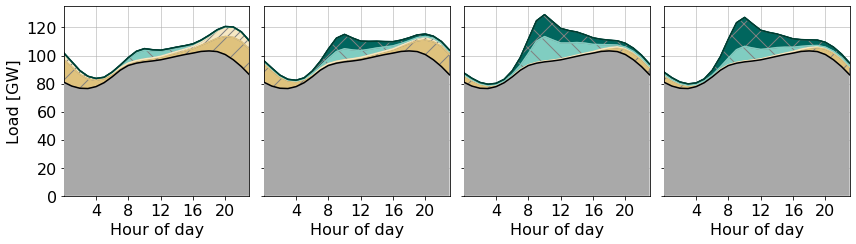

In [25]:
baseline_across([load1, load2, load3, load4],  mean_weekday=mean_weekday, titles1=['Universal Home Access', 'High Home Access', 'Low Home, High Work Access', 'Low Home, Low Work Access'], titles2=['with Midnight Timers', 'with 9pm Timers', 'with Max(Solar) Work Control', 'with Min(Peak) Work Control'])

In [22]:
def plot_stack_multiple_threes(test3_list, test3_list2, test3_list3, mean_weekday, bau_list, titles1=None, titles2=None, diff_ylim=35, yticks=[0, 10, 20, 30], ylim2=125, yticks2=[0,20,40,60,80,100,120]):
    
    n = len(test3_list)
    colors = {'Residential L2': '#dfc27d', 'MUD L2': '#f6e8c3', 'Workplace L2': '#80cdc1', 'Public L2': '#01665e', 'Public DCFC': '#003c30'}
    scenario_names=['Universal Home Access', 'Base Case Access', 'Low Home, High Work Access', 'Low Home, Low Work Access']
    patterns = ['/', '///', '\\', 'x', '.', '*']

    fig, ax = plt.subplots(n+1, 3, figsize=(9,12), gridspec_kw={})
    for j, test3 in enumerate(test3_list):
        baseline = np.zeros((1440, ))
        for i, key in enumerate(test3.columns[1:]):
            ax[j, 0].plot((1/60)*np.arange(0, 1440), baseline+(1/1000)*(1/1000)*test3[key].values, color=colors[key])
            ax[j, 0].fill_between((1/60)*np.arange(0, 1440), baseline, baseline+(1/1000)*(1/1000)*test3[key].values, hatch=patterns[i], facecolor=colors[key], label=key, edgecolor='grey')
            baseline += (1/1000)*(1/1000)*test3[key].values
        ax[j, 0].set_xlim([0, 24])
        ax[j, 0].set_xticks([0, 4, 8, 12, 16, 20])
        ax[j, 0].set_xticklabels([])
        ax[j, 0].set_ylim([0, diff_ylim])
        ax[j, 0].set_yticks(yticks)
        ax[j, 0].set_yticklabels([])
        
        ax[j, 0].set_axisbelow(True)        
        ax[j, 0].grid(alpha=0.7)
        
    test3 = bau_list[0]
    j += 1
    baseline = np.zeros((1440, ))
    for i, key in enumerate(test3.columns[1:]):
        ax[j, 0].plot((1/60)*np.arange(0, 1440), baseline+(1/1000)*(1/1000)*test3[key].values, color=colors[key])
        ax[j, 0].fill_between((1/60)*np.arange(0, 1440), baseline, baseline+(1/1000)*(1/1000)*test3[key].values, hatch=patterns[i], facecolor=colors[key], label=key, edgecolor='grey')
        baseline += (1/1000)*(1/1000)*test3[key].values
    ax[j, 0].set_xlim([0, 24])
    ax[j, 0].set_xticks([0, 4, 8, 12, 16, 20])
    ax[j, 0].set_xticklabels([])
    ax[j, 0].set_ylim([0, diff_ylim])
    ax[j, 0].set_yticks(yticks)
    ax[j, 0].set_yticklabels([])
    ax[j, 0].set_axisbelow(True)        
    ax[j, 0].grid(alpha=0.7)
    
            
    for j, test3 in enumerate(test3_list3):
        baseline = np.zeros((1440, ))
        for i, key in enumerate(test3.columns[1:]):
            ax[j, 1].plot((1/60)*np.arange(0, 1440), baseline+(1/1000)*(1/1000)*test3[key].values, color=colors[key])
            ax[j, 1].fill_between((1/60)*np.arange(0, 1440), baseline, baseline+(1/1000)*(1/1000)*test3[key].values, hatch=patterns[i], facecolor=colors[key], label=key, edgecolor='grey')
            baseline += (1/1000)*(1/1000)*test3[key].values
        ax[j, 1].set_xlim([0, 24])
        ax[j, 1].set_xticks([0, 4, 8, 12, 16, 20])
        ax[j, 1].set_xticklabels([])
        ax[j, 1].set_ylim([0, diff_ylim])
        ax[j, 1].set_yticks(yticks)
        ax[j, 1].set_yticklabels([])
        ax[j, 1].set_axisbelow(True)        
        ax[j, 1].grid(alpha=0.7)

    test3 = bau_list[1]
    j += 1
    baseline = np.zeros((1440, ))
    for i, key in enumerate(test3.columns[1:]):
        ax[j, 1].plot((1/60)*np.arange(0, 1440), baseline+(1/1000)*(1/1000)*test3[key].values, color=colors[key])
        ax[j, 1].fill_between((1/60)*np.arange(0, 1440), baseline, baseline+(1/1000)*(1/1000)*test3[key].values, hatch=patterns[i], facecolor=colors[key], label=key, edgecolor='grey')
        baseline += (1/1000)*(1/1000)*test3[key].values
    ax[j, 1].set_xlim([0, 24])
    ax[j, 1].set_xticks([0, 4, 8, 12, 16, 20])
    ax[j, 1].set_xticklabels([])
    ax[j, 1].set_ylim([0, diff_ylim])
    ax[j, 1].set_yticks(yticks)
    ax[j, 1].set_yticklabels([])
    ax[j, 1].set_axisbelow(True)        
    ax[j, 1].grid(alpha=0.7)
    
    
            
    for j, test3 in enumerate(test3_list2):
        baseline = np.zeros((1440, ))
        for i, key in enumerate(test3.columns[1:]):
            ax[j, 2].plot((1/60)*np.arange(0, 1440), baseline+(1/1000)*(1/1000)*test3[key].values, color=colors[key])
            ax[j, 2].fill_between((1/60)*np.arange(0, 1440), baseline, baseline+(1/1000)*(1/1000)*test3[key].values, hatch=patterns[i], facecolor=colors[key], label=key, edgecolor='grey')
            baseline += (1/1000)*(1/1000)*test3[key].values
        ax[j, 2].set_xlim([0, 24])
        ax[j, 2].set_xticks([0, 4, 8, 12, 16, 20])
        ax[j, 2].set_xticklabels([])
        ax[j, 2].set_ylim([0, diff_ylim])
        ax[j, 2].set_yticks(yticks)
        ax[j, 2].set_yticklabels([])
        ax[j, 2].set_axisbelow(True)        
        ax[j, 2].grid(alpha=0.7)
        
    ax[j+1, 2].set_axis_off()

    handles, labels = ax[0, 0].get_legend_handles_labels()
    ax[0, 0].legend(handles[0:2], labels[0:2], loc='upper left', fontsize=14)
    ax[0, 1].legend(handles[2:], labels[2:], loc='upper left', fontsize=14)

    for j in range(n+1):
        ax[j, 0].set_ylabel('Load [GW]', fontsize=16)
        ax[j, 0].set_yticklabels(yticks, fontsize=16)
    for j in range(3):
        ax[4, j].set_xlabel('Hour of day', fontsize=16)
        ax[4, j].set_xticklabels([0, 4, 8, 12, 16, 20], fontsize=16)
        
    plt.tight_layout()
    plt.savefig('Figure1_unlabeled.pdf', bbox_inches='tight')
    plt.show()

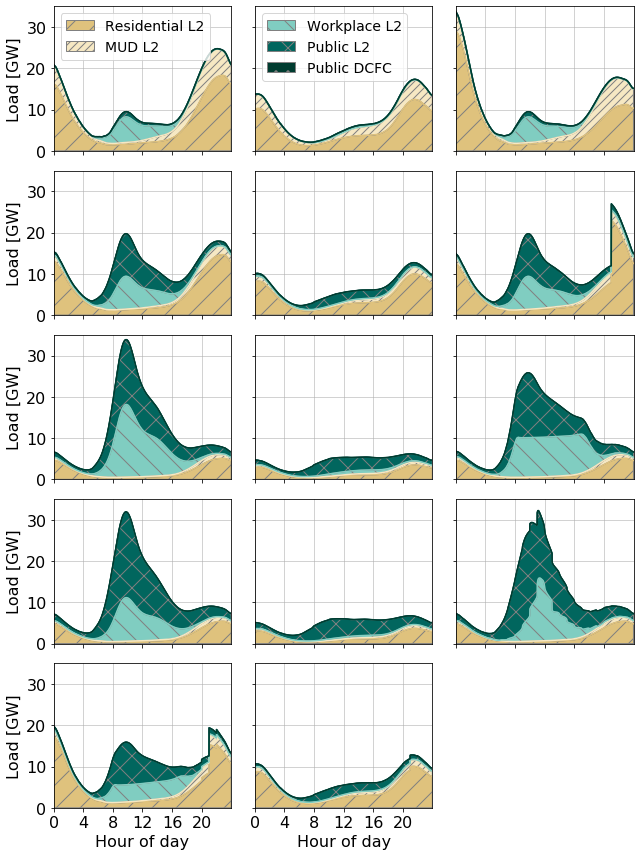

In [23]:
plot_stack_multiple_threes([load1, load2, load3, load4], [load5, load6, load7, load8], 
                           [load12, load22, load32, load42], mean_weekday=mean_weekday, 
                           bau_list=[load9, load92],
                           titles1=['Universal Home Access', 'High Home Access', 'Low Home, High Work Access', 'Low Home, Low Work Access'], titles2=['with Midnight Timers', 'with 9pm Timers', 'with Min(Avg Emissions) Work Control', 'with Min(Peak) Work Control'])
